## Bidirectional RNNS 
- we can use bidirectional RNNs to capture the context from both directions not just the past(left)
- eg. speech recognition, sentiment analysis, named entity recognition, etc.
- simply implement 2 unidirectional RNNS chained together in opposite directions. for output we just concatenate the outputs of the 2 RNNs
- 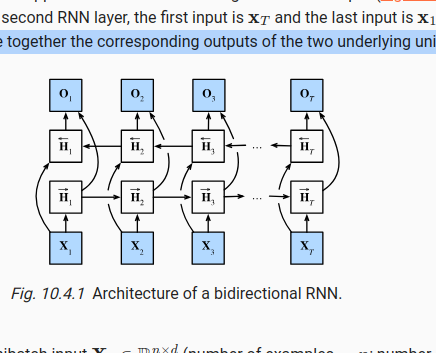
$$
\overrightarrow{H}_t = \phi(X_t W_{xh}^{(f)} + \overrightarrow{H}_{t-1} W_{hh}^{(f)} + b_h^{(f)})
$$

$$
\overleftarrow{H}_t = \phi(X_t W_{xh}^{(b)} + \overleftarrow{H}_{t+1} W_{hh}^{(b)} + b_h^{(b)})
$$
- 

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class BiRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.f_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.b_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.num_hiddens *= 2  # The output dimension will be doubled

In [3]:
@d2l.add_to_class(BiRNNScratch)
def forward(self, inputs, Hs=None):
    f_H, b_H = Hs if Hs is not None else (None, None)
    f_outputs, f_H = self.f_rnn(inputs, f_H)
    b_outputs, b_H = self.b_rnn(reversed(inputs), b_H)
    outputs = [torch.cat((f, b), -1) for f, b in zip(
        f_outputs, reversed(b_outputs))]
    return outputs, (f_H, b_H)

In [10]:
class BiGRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, bidirectional=True)
        self.num_hiddens *= 2